<a href="https://colab.research.google.com/github/irwanrezaf/Fuzzy-Logic/blob/main/Tupro_2_Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1LLIqdkukJlMhIH5ezUSj3DcKHysyIT__

#melakukan download dataset pada google drive 
#https://drive.google.com/file/d/1LLIqdkukJlMhIH5ezUSj3DcKHysyIT__/view?usp=sharing


Downloading...
From: https://drive.google.com/uc?id=1LLIqdkukJlMhIH5ezUSj3DcKHysyIT__
To: /content/restoran.xlsx
100% 10.5k/10.5k [00:00<00:00, 8.78MB/s]


In [ ]:
#import library pandas
import pandas as pd

# import dataset dan lihat 10 data pertama  
data_frame = pd.read_excel("restoran.xlsx")
data_frame.head(10)

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
5,6,59,10
6,7,61,8
7,8,30,10
8,9,45,1
9,10,36,9


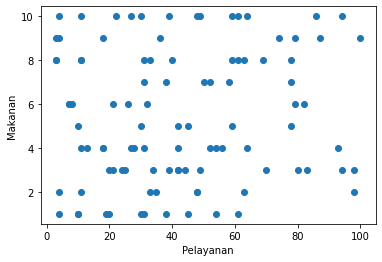

In [ ]:
#import library matplotlib untuk ploting data
import matplotlib.pyplot as plt

# lihat plotingan data restoran 
plt.scatter(data_frame.pelayanan, data_frame.makanan)

#buat label pada grafik plotingan
plt.xlabel("Pelayanan")
plt.ylabel("Makanan")

#tampilkan plot
plt.show()

In [ ]:
def plot_linguistik(point, warna, label='', min=0, max=1):

   
    # set nilai y 
    y = [0, 1, 1, 0]

    # plot garis pertama
    plt.plot([min, point[0]], [0, 0], warna)
    
    # plot garis antara garis pertama dan terakhir
    for i in range(len(point) - 1):
        plt.plot([point[i], point[i + 1]], [y[i], y[i + 1]], warna)
    
    # plot garis terakhir
    plt.plot([point[3], max], [0, 0], warna, label=label)



In [ ]:
def plot_membership(membership, min=0, max=1):

    
    # Warna yang akan ditampilkan dalam plot
    colors = ['c', 'm', 'y', 'k']

    # Plot masing-masing linguistik
    i = 0
    for ling in membership:
        plot_linguistik(membership[ling], colors[i], ling, min=min, max=max)
        i += 1
    
    plt.legend(loc=4)
    plt.show()

In [ ]:
def fuzzy_linguistik(x, point):

    
    # jika point berada didepan dan dibelakang grafik
    if x < point[0] or x > point[3]:
        return 0
    
    # jika point berada ditengah grafik
    elif x >= point[1] and x <= point[2]:
        return 1
    
    # jika point berada di 1/4 grafik kiri
    elif x >= point[0] and x < point[1]:
        return (x - point[0]) / (point[1] - point[0])
    
    # jika point berada di 1/4 grafik kanan
    elif x >= point[2] and x < point[3]:
        return (point[3] - x) / (point[3] - point[2])

    return 0



In [ ]:
def fuzzy_keanggotaan(x, keanggotaan):

    
    result = {}

    # Mencari nilai fuzzy untuk masing-masing linguistik dalam Membership
    for ling in keanggotaan:
        result[ling] = fuzzy_linguistik(x, keanggotaan[ling])

    return result



In [ ]:
def fuzzyfikasi(x, list_keanggotaan):

    result = []
    
    # hitung seluruh hasil fuzzyfication dari seluruh membership
    for i in range(len(list_keanggotaan)):
        result.append(fuzzy_keanggotaan(x[i], list_keanggotaan[i]))

    return result

In [ ]:
def inferensi(nilai_fuzzy, rule):

    
    result = {}

    # loop seluruh linguistik l dan value v dari hasil fuzzyfication
    for l1, v1 in nilai_fuzzy[0].items():
        for l2, v2 in nilai_fuzzy[1].items():

            # r dan min_value merupakan kombinasi dua linguistik
            # dan value minimal dari kedua linguistik
            r, min_value = (l1, l2), min(v1, v2)
            
            # lihat nilai yang sudah didapat pada hasil
            current_value = result.get(rule[r], 0)
            
            # replace nilai hasil apabila current value lebih kecil
            result[rule[r]] = max(min_value, current_value)

    return result

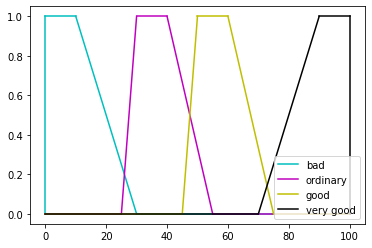

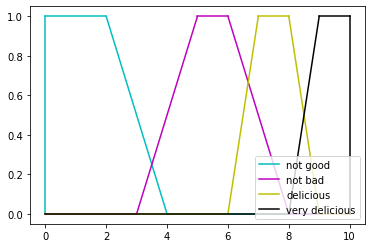

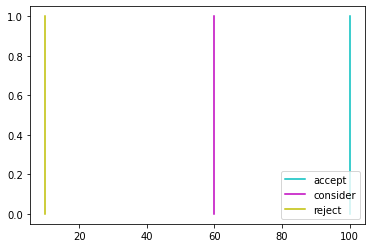

In [ ]:
# Membership Pelayanan
pelayanan = {
    'bad'   : [ 0,  0,  10,  30],
    'ordinary'   : [ 25,  30,  40,  55],
    'good'  : [ 45, 50, 60, 75],
    'very good'  : [70, 90, 100, 100]
}

# Membership Makanan
makanan = {
    'not good'   : [0,  0,  2,  4],
    'not bad'   : [3,  5,  6,  8],
    'delicious'      : [6,  7,  8,  9],
    'very delicious' : [8, 9 , 10 , 10]
}

# Plot Membership Pelayanan dan Makanan
plot_membership(pelayanan, max=100)
plot_membership(makanan, max=10)

# Rule Inference
rule = {
    ('bad' , 'not good')   : 'reject',
    ('bad' , 'not bad')  : 'reject',
    ('bad' , 'delicious')    : 'consider',
    ('bad' , 'very delicious') : 'consider',
    ('ordinary' , 'not good')   : 'reject',
    ('ordinary' , 'not bad')  : 'reject',
    ('ordinary' , 'delicious')    : 'consider',
    ('ordinary' , 'very delicious') : 'consider',
    ('good' , 'not good')   : 'reject',
    ('good' , 'not bad')  : 'reject',
    ('good' , 'delicious')    : 'consider',
    ('good' , 'very delicious') : 'accept',
    ('very good' , 'not good')   : 'reject',
    ('very good' , 'not bad')  : 'consider',
    ('very good' , 'delicious')    : 'consider',
    ('very good' , 'very delicious') : 'accept',
    
}

# Membership Sugeno
accept_sugeno = {'accept':100, 'consider':60, 'reject':10}

# Plot Membership Sugeno
colors = 'cmyk'
for key, val in accept_sugeno.items():
    plt.plot([val, val], [0, 1], colors[0], label=key )
    colors = colors[1:]
plt.legend(loc=4)

plt.show()

In [ ]:
def defuzz_sugeno(x_infer, membership):

   
    num, den = 0, 0

    # Penggunaan Rumus Defuzz Sugeno
    for ling in membership:
        num += x_infer[ling] * membership[ling]
        den += x_infer[ling]
        
    return num / den

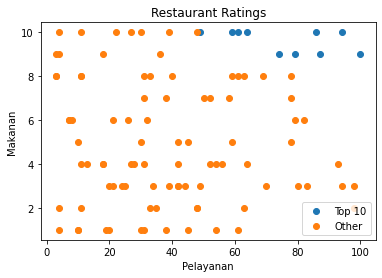

In [ ]:
# lakukan seluruh proses fuzzy pada dataset
inference = []
skor = []

for x in data_frame.drop('id', axis=1).values:
    x_fuzzy = fuzzyfikasi(x, [pelayanan, makanan])
    x_infer = inferensi(x_fuzzy, rule)
    # Proses mendapatkan skor untuk masing-masing
    x_defuz = defuzz_sugeno(x_infer, accept_sugeno)
    
    skor.append(x_defuz)
    inference.append(x_infer)

# Append skor kedalam dataset
data_frame['Skor'] = skor
data_frame['Infer'] = inference

# Mencari 10 restoran terbaik
data_frame_top_ten = data_frame.sort_values(by='Skor', ascending=False)[:10]
data_frame_other = data_frame.drop(data_frame_top_ten.index)



# Plot Restoran berdasarkan Skor
plt.scatter(data_frame_top_ten.pelayanan,
            data_frame_top_ten.makanan,
            label='Top 10')
plt.scatter(data_frame_other.pelayanan,
            data_frame_other.makanan,
            label='Other')

# Informasi tambahan pada Grafik
plt.xlabel('Pelayanan')
plt.ylabel('Makanan')
plt.title('Restaurant Ratings')
plt.legend(loc='lower right')

plt.show()

In [ ]:
x

array([11,  8])

In [ ]:
x_fuzzy

[{'bad': 0.95, 'good': 0, 'ordinary': 0, 'very good': 0},
 {'delicious': 1, 'not bad': 0, 'not good': 0, 'very delicious': 0.0}]

In [ ]:
x_infer

{'accept': 0, 'consider': 0.95, 'reject': 0}

In [ ]:
x_defuz

60.0

In [ ]:
# Tampilkan 10 Restoran Terbaik
data_frame_top_ten

,id,pelayanan,makanan,Skor,Infer
68,69,86,10,100.000000,"{'reject': 0, 'consider': 0, 'accept': 0.8}"
78,79,87,9,100.000000,"{'reject': 0, 'consider': 0, 'accept': 0.85}"
41,42,94,10,100.000000,"{'reject': 0, 'consider': 0, 'accept': 1}"
24,25,61,10,100.000000,"{'reject': 0, 'consider': 0, 'accept': 0.93333..."
23,24,100,9,100.000000,"{'reject': 0, 'consider': 0, 'accept': 1}"
5,6,59,10,100.000000,"{'reject': 0, 'consider': 0, 'accept': 1}"
21,22,79,9,100.000000,"{'reject': 0, 'consider': 0, 'accept': 0.45}"
53,54,64,10,100.000000,"{'reject': 0, 'consider': 0, 'accept': 0.73333..."
30,31,74,9,100.000000,"{'reject': 0, 'consider': 0, 'accept': 0.2}"
19,20,49,10,86.666667,"{'reject': 0, 'consider': 0.4, 'accept': 0.8}"


In [ ]:
data_frame_other = data_frame.sort_values(by='Skor', ascending=False)[10:]


# Tampilkan Restoran yang belum masuk 10 Terbaik

data_frame_other

,id,pelayanan,makanan,Skor,Infer
50,51,48,10,82.5,"{'reject': 0, 'consider': 0.4666666666666667, ..."
76,77,11,10,60.0,"{'reject': 0, 'consider': 0.95, 'accept': 0}"
82,83,69,8,60.0,"{'reject': 0, 'consider': 0.4, 'accept': 0}"
33,34,93,4,60.0,"{'reject': 0, 'consider': 0.5, 'accept': 0}"
97,98,27,10,60.0,"{'reject': 0, 'consider': 0.4, 'accept': 0}"
...,...,...,...,...,...
58,59,28,4,10.0,"{'reject': 0.5, 'consider': 0, 'accept': 0}"
18,19,42,3,10.0,"{'reject': 0.5, 'consider': 0, 'accept': 0}"
60,61,42,4,10.0,"{'reject': 0.5, 'consider': 0, 'accept': 0}"
63,64,35,2,10.0,"{'reject': 1, 'consider': 0, 'accept': 0}"


In [ ]:
# Export data dalam bentuk CSV

data_frame_top_ten.to_csv("Top_10_Restaurants.csv")

In [ ]:
data_frame_other.to_csv("Other_Restaurant.csv")

In [ ]:
# data_frame_top_ten.to_excel('excelnibous.xls')

In [ ]:
data_frame_result = data_frame_top_ten[['id']]


In [ ]:
data_frame_result

,id
68,69
78,79
41,42
24,25
23,24
5,6
21,22
53,54
30,31
19,20


In [ ]:
data_frame_result.to_excel('peringkat.xls', index=False)

In [ ]:
data_frame_result

,id
68,69
78,79
41,42
24,25
23,24
5,6
21,22
53,54
30,31
19,20
